<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220526.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* GridSearchCV
* RFM

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# GridSearchCV

In [24]:
raw = skd.load_breast_cancer()
X, y  = pd.DataFrame(raw['data'], columns = raw['feature_names']), raw['target']
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
print(X.shape)
print('=' * 10)
print(X.isnull().sum())

(569, 30)
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [27]:
x_tr, x_te, y_tr, y_te = train_test_split(X,y, train_size = .7)

In [28]:
scaler = StandardScaler()
x_tr_std = scaler.fit_transform(x_tr)
x_te_std = scaler.transform(x_te)

In [29]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)
proba_rf = fit_rf.predict_proba(x_te)[:,-1]

In [30]:
accuracy_score(y_tr, fit_rf.predict(x_tr)), accuracy_score(y_te, pred_rf)

(1.0, 0.9532163742690059)

In [31]:
fpr, tpr, threshold = roc_curve(y_te, proba_rf)

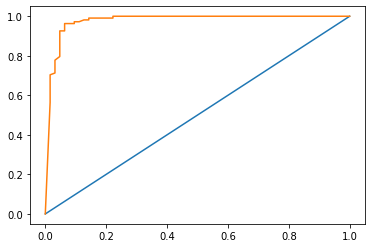

In [32]:
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)

In [37]:
fit_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
param = {'n_estimators' : [100, 200, 300],
         'min_samples_leaf' : [1, 2, 4, 8, 10],
         'min_samples_split' : [2, 4, 8, 10],
         'max_depth' : [6, 12, 18]
         }

In [48]:
grid_rf = GridSearchCV(fit_rf, param_grid=param, scoring = 'accuracy', n_jobs = -1, verbose = 1)

In [53]:
grid_rf.fit(x_tr, y_tr)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 12, 18],
                         'min_samples_leaf': [1, 2, 4, 8, 10],
                         'min_samples_split': [2, 4, 8, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [55]:
grid_rf.best_params_

{'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [59]:
fit_rf_best = RandomForestClassifier(max_depth = 12, 
                                     min_samples_leaf = 1,
                                     min_samples_split = 4,
                                     n_estimators = 100
                                     ).fit(x_tr, y_tr)

In [64]:
pred_rf_best = fit_rf_best.predict(x_te)
proba_rf_best = fit_rf_best.predict_proba(x_te)[:,-1]
fpr_best, tpr_best, threshold_best = roc_curve(y_te, proba_rf_best)

In [63]:
accuracy_score(y_te, pred_rf), accuracy_score(y_te, pred_rf_best), accuracy_score(y_te, pred_rf) < accuracy_score(y_te, pred_rf_best)

(0.9532163742690059, 0.9532163742690059, False)

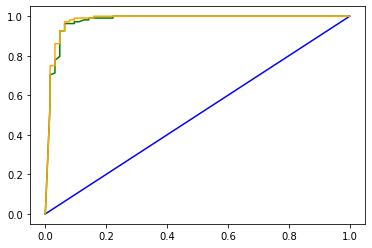

In [65]:
plt.plot([0,1], [0,1], color = 'blue')
plt.plot(fpr, tpr, color = 'green')
plt.plot(fpr_best, tpr_best, color = 'orange')

# RFM

In [67]:
os.chdir('../')
os.listdir()

['lib64',
 'usr',
 'tmp',
 'var',
 'proc',
 'srv',
 'bin',
 'etc',
 'sbin',
 'media',
 'root',
 'sys',
 'opt',
 'run',
 'boot',
 'home',
 'dev',
 'lib',
 'mnt',
 'retail_data_transactions.csv',
 'retail_data_response.csv',
 '.dockerenv',
 'tools',
 'datalab',
 'tensorflow-1.15.2',
 'content',
 'lib32',
 'python-apt']

In [68]:
df_trans = pd.read_csv('retail_data_transactions.csv')
df_res = pd.read_csv('retail_data_response.csv')

In [73]:
df_trans['trans_date'] = pd.to_datetime(df_trans['trans_date'])
df_trans.head()

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


In [78]:
df = pd.merge(df_trans, df_res, how = 'left', on = 'customer_id')
df = df.assign(response = lambda x : np.where(x['response'] == 1, 'o', 'x'))
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,o
1,CS4768,2015-03-15,39,o
2,CS2122,2013-02-26,52,x
3,CS1217,2011-11-16,99,x
4,CS1850,2013-11-20,78,x


In [80]:
df = df.sort_values(['customer_id', 'trans_date'], ascending=[0, 0])
df.head()

,customer_id,trans_date,tran_amount,response
113705,CS9000,2015-02-28,34,x
102384,CS9000,2014-08-24,35,x
103039,CS9000,2014-07-08,26,x
113120,CS9000,2014-05-08,20,x
102102,CS9000,2014-01-12,16,x


In [108]:
info_r = df.groupby(['customer_id'])['trans_date'].apply(lambda x : np.max(x)).reset_index()
info_f = df.groupby(['customer_id'])['tran_amount'].apply(lambda x : np.size(x)).reset_index()
info_m = df.groupby(['customer_id'])['tran_amount'].apply(lambda x : sum(x)).reset_index()

info_r.columns = ['customer_id', 'redency']
info_f.columns = ['customer_id', 'freq']
info_m.columns = ['customer_id', 'money']

In [109]:
info = pd.merge(info_r, info_f, how = 'left', on = 'customer_id')
info = pd.merge(info, info_m, how = 'left', on = 'customer_id')
info.head()

,customer_id,redency,freq,money
0,CS1112,2015-01-14,15,1012
1,CS1113,2015-02-09,20,1490
2,CS1114,2015-02-12,19,1432
3,CS1115,2015-03-05,22,1659
4,CS1116,2014-08-25,13,857


In [112]:
df2 = pd.merge(df, info, how = 'left', on = 'customer_id')
df2.head()

,customer_id,trans_date,tran_amount,response,redency,freq,money
0,CS9000,2015-02-28,34,x,2015-02-28,13,533
1,CS9000,2014-08-24,35,x,2015-02-28,13,533
2,CS9000,2014-07-08,26,x,2015-02-28,13,533
3,CS9000,2014-05-08,20,x,2015-02-28,13,533
4,CS9000,2014-01-12,16,x,2015-02-28,13,533


In [120]:
df2 = df2.assign(redency_diff = df2['redency'] - df2['trans_date'] + np.timedelta64(1, 'D'))
df2.head()

,customer_id,trans_date,tran_amount,response,redency,freq,money,redency_diff
0,CS9000,2015-02-28,34,x,2015-02-28,13,533,1 days
1,CS9000,2014-08-24,35,x,2015-02-28,13,533,189 days
2,CS9000,2014-07-08,26,x,2015-02-28,13,533,236 days
3,CS9000,2014-05-08,20,x,2015-02-28,13,533,297 days
4,CS9000,2014-01-12,16,x,2015-02-28,13,533,413 days


In [128]:
df2.groupby('customer_id').apply(lambda x : x.iloc[1,:])

,customer_id,trans_date,tran_amount,response,redency,freq,money,redency_diff
customer_id,,,,,,,,
CS1112,CS1112,2014-12-04,59,x,2015-01-14,15,1012,42 days
CS1113,CS1113,2015-02-09,98,x,2015-02-09,20,1490,1 days
CS1114,CS1114,2014-12-31,95,o,2015-02-12,19,1432,44 days
CS1115,CS1115,2014-06-18,95,o,2015-03-05,22,1659,261 days
CS1116,CS1116,2014-06-08,60,o,2014-08-25,13,857,79 days
...,...,...,...,...,...,...,...,...
CS8996,CS8996,2014-11-28,68,x,2014-12-09,13,582,12 days
CS8997,CS8997,2014-02-21,39,x,2014-06-28,14,543,128 days
CS8998,CS8998,2014-10-22,33,x,2014-12-22,13,624,62 days
